# Лабораторна робота 1

З генеральної сукупності взято вибірку:

In [1]:
import numpy as np

l = """3 5  6 8 4 5 4 7 2 7 7 3 7 4 4
       5 4  4 5 2 4 8 8 4 6 5 9 4 0 4
       4 4  9 3 3 2 1 5 2 5 5 3 4 4 7
       8 9 11 4 5 2 6 7 6 1 2 5 6 3 1
       2 6  7 3 3 2 5 4 8 2 6 5 9 5 5
       2 8  3 6 4 6 6 8 7 3 3 7 3 
    """
a = [int(s) for s in l.split()]
an = np.array(a)
an

array([ 3,  5,  6,  8,  4,  5,  4,  7,  2,  7,  7,  3,  7,  4,  4,  5,  4,
        4,  5,  2,  4,  8,  8,  4,  6,  5,  9,  4,  0,  4,  4,  4,  9,  3,
        3,  2,  1,  5,  2,  5,  5,  3,  4,  4,  7,  8,  9, 11,  4,  5,  2,
        6,  7,  6,  1,  2,  5,  6,  3,  1,  2,  6,  7,  3,  3,  2,  5,  4,
        8,  2,  6,  5,  9,  5,  5,  2,  8,  3,  6,  4,  6,  6,  8,  7,  3,
        3,  7,  3])

Сумма генеральної сукупності

In [2]:
an.sum()

423

In [3]:
sum(a)

423

1) Запишемо варіаційний ряд

абсолютні частоти

In [4]:
import collections
counter = collections.Counter(an)
l_keys = list(counter.keys())
l_values = list(counter.values()) 
print(l_keys)
print(l_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
[1, 3, 10, 12, 17, 14, 10, 9, 7, 4, 1]


In [5]:
hist, bin_edges = np.histogram(an)
print(np.unique(an))
print(hist)

[ 0  1  2  3  4  5  6  7  8  9 11]
[ 4 10 12 17 14 10  9  7  4  1]


In [6]:
ls = []
print(list(set(an)))
for j in list(set(an)):
    ls.append(np.count_nonzero(an == j))
print(ls)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
[1, 3, 10, 12, 17, 14, 10, 9, 7, 4, 1]


In [7]:
from itertools import groupby
freq = {key:len(list(group)) for key, group in groupby(np.sort(an))}
print(freq)
print(list(freq.keys()))
print(list(freq.values()))

{0: 1, 1: 3, 2: 10, 3: 12, 4: 17, 5: 14, 6: 10, 7: 9, 8: 7, 9: 4, 11: 1}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
[1, 3, 10, 12, 17, 14, 10, 9, 7, 4, 1]


2) Обчислимо моду

In [8]:
from statistics import mode
mode(an)

4

In [9]:
repeticiones = 0
for i in a:
    apariciones = a.count(i)
    if apariciones > repeticiones:
        repeticiones = apariciones

modas = []
for i in a:
    apariciones = a.count(i)
    if apariciones == repeticiones and i not in modas:
        modas.append(i)

print(modas)

[4]


In [10]:
counts = np.bincount(an)
print(np.argmax(counts))

4


Медіана

In [11]:
from statistics import median
print(np.median(an))
print(median(an))

5.0
5.0


Варіаційний ряд відносних частот

In [12]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(round(i / len(an), 3))
print(l_rel)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
[1, 3, 10, 12, 17, 14, 10, 9, 7, 4, 1]
[0.011, 0.034, 0.114, 0.136, 0.193, 0.159, 0.114, 0.102, 0.08, 0.045, 0.011]


In [13]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(i / len(a))
print(np.array(l_rel))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
[1, 3, 10, 12, 17, 14, 10, 9, 7, 4, 1]
[ 0.01136364  0.03409091  0.11363636  0.13636364  0.19318182  0.15909091
  0.11363636  0.10227273  0.07954545  0.04545455  0.01136364]


Гістограма та полігон абсолютних частот

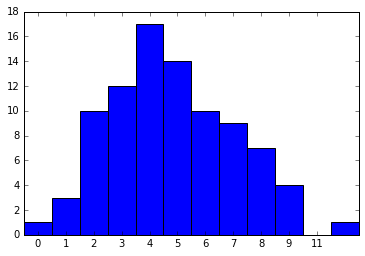

In [32]:
import matplotlib.pyplot as plt
width = 1
plt.bar(list(counter), l_values, width)
plt.xticks(np.arange(len(l_keys)) + width * 0.5, l_keys)
plt.show()

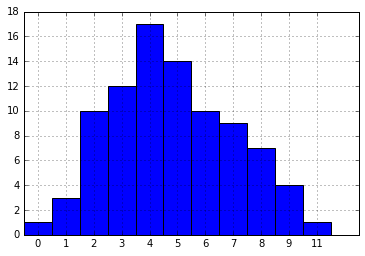

In [31]:
from collections import Counter
labels, values = zip(*Counter(a).items())
indexes = np.arange(len(labels))
width = 1
plt.grid(True)
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

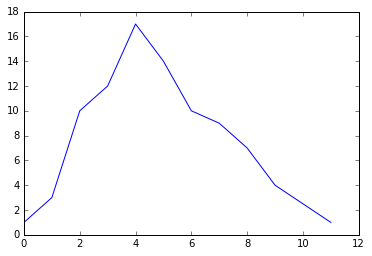

In [16]:
plt.plot(list(counter.keys()), values)
plt.show()

In [17]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
iplot([{"x": list(counter), "y": l_values}])

Гістограма та полігон відносних частот

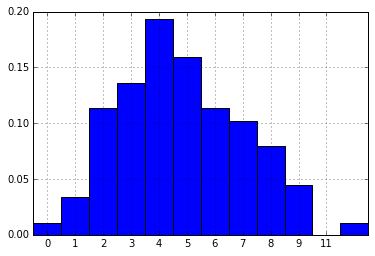

In [33]:
from collections import Counter
labels, values = zip(*Counter(a).items())
indexes = np.arange(len(labels))
width = 1
plt.grid(True)
plt.bar(list(counter), l_rel, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

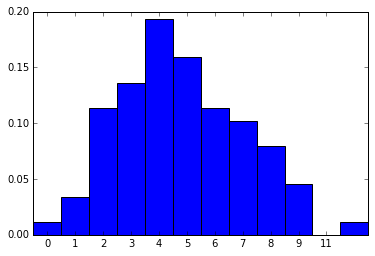

In [18]:
plt.bar(list(counter), l_rel, width)
plt.xticks(np.arange(len(l_keys)) + width * 0.5, l_keys)
plt.show()

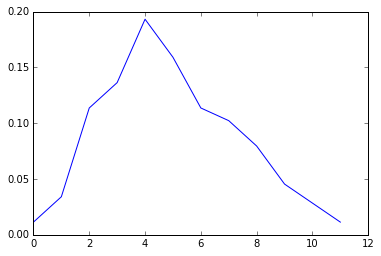

In [19]:
plt.plot(list(counter.keys()), l_rel)
plt.show()

In [20]:
init_notebook_mode(connected=True)
iplot([{"x": list(counter.keys()), "y": l_rel}])

4.1) Вибіркове середнє є незміщеною оцінкою генерального середнього і обчислюються за формулою.
Sample mean and covariance

In [21]:
from statistics import mean
print(mean(a))
print(np.mean(an))

4.806818181818182
4.80681818182


4.2) Знайдемо незміщену оцінку генеральної дисперсії та середнього квадратичного відхилення:

sample variance

In [22]:
from statistics import variance
print(variance((a)))
print(np.cov(an))

4.985240334378266
4.985240334378265


Знайдемо середнє відхилення.


mean absolute deviation MAD

In [23]:
n = float(len(an))
mean = sum(an) / n
diff = [abs(x - mean) for x in an]
sum(diff) / n

1.8112086776859497

sqrt(Db)

In [24]:
from statistics import pvariance
from math import sqrt
print(sqrt(pvariance((a))))
print(sqrt(np.var(an)))

2.220042764460419
2.220042764460419


Знайдемо коефіцієнт варіації V 

Statistical dispersion

In [25]:
print((sqrt(np.var(an)) / np.mean(an)) )

0.461852868257


Накопичені частоти сортовані

In [26]:
ls = []
print(l_rel)
for i in range(len(l_rel)):
    ls.append(sum(l_rel[i:len(l_rel)]))
ls.reverse()

[0.011363636363636364, 0.03409090909090909, 0.11363636363636363, 0.13636363636363635, 0.19318181818181818, 0.1590909090909091, 0.11363636363636363, 0.10227272727272728, 0.07954545454545454, 0.045454545454545456, 0.011363636363636364]


Накопичені частоти

In [27]:
cumulative_frequencies = np.cumsum(l_rel).round(3)
cumulative_frequencies

array([ 0.011,  0.045,  0.159,  0.295,  0.489,  0.648,  0.761,  0.864,
        0.943,  0.989,  1.   ])

Складемо другу статистичну таблицю

In [28]:
l_rel = np.array(l_rel).round(3)
import pandas as pd
x = pd.DataFrame({'Варіанта': range(len(l_keys)), 'Абсолютні частоти': list(counter.values()),
                  'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
x

,Абсолютні частоти,Варіанта,Відносні частоти,Накопичені частоти
0,1,0,0.011,0.011
1,3,1,0.034,0.045
2,10,2,0.114,0.159
3,12,3,0.136,0.295
4,17,4,0.193,0.489
5,14,5,0.159,0.648
6,10,6,0.114,0.761
7,9,7,0.102,0.864
8,7,8,0.080,0.943
9,4,9,0.045,0.989
